In [1]:
!pushd $TMPDIR \
&& wget https://surfer.nmr.mgh.harvard.edu/pub/data/voxelmorph/tutorial_data.tar.gz -O data.tar.gz \
&& tar -xzvf data.tar.gz \
&& popd

--2022-07-06 09:04:21--  https://surfer.nmr.mgh.harvard.edu/pub/data/voxelmorph/tutorial_data.tar.gz
Resolving surfer.nmr.mgh.harvard.edu (surfer.nmr.mgh.harvard.edu)... 132.183.1.43
Connecting to surfer.nmr.mgh.harvard.edu (surfer.nmr.mgh.harvard.edu)|132.183.1.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16644702 (16M) [application/x-gzip]
Saving to: ‘data.tar.gz’

data.tar.gz         100%[===================>]  15.87M  37.6MB/s    in 0.4s    

2022-07-06 09:04:21 (37.6 MB/s) - ‘data.tar.gz’ saved [16644702/16644702]

x brain_2d_no_smooth.h5
x brain_2d_smooth.h5
x brain_3d.h5
x fs_rgb.npy
x subj1.npz
x subj2.npz
x tutorial_data.npz


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from cornucopia import ContrastMixtureTransform
import os

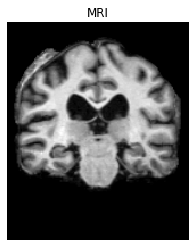

In [3]:
fname = os.path.join(os.environ['TMPDIR'], 'tutorial_data.npz')
dat = np.load(fname)['train'][0]
dat = torch.as_tensor(dat)

plt.imshow(dat, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('MRI')
plt.show()

Let us instantiate a contrast augmentation layer and apply it to the MRI.
We use fewer classes (6) than the default (12), because we're dealing
with skull-stripped 2D images, that have much fewer intensity modes than
an intact 3D volume.

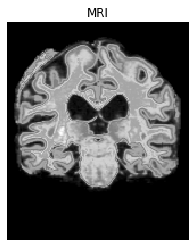

In [4]:
trf = ContrastMixtureTransform(nk=6)
aug = trf(dat[None])[0]

plt.imshow(aug, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('MRI')
plt.show()

Now, let's synthesize a bunch of them

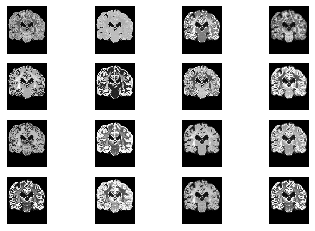

In [5]:
shape = [4, 4]

for i in range(shape[0] * shape[1]):
    plt.subplot(*shape, i+1)
    plt.imshow(trf(dat[None])[0], cmap='gray', interpolation='nearest')
    plt.axis('off')
plt.show()